In [85]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical
import random

In [86]:
np.random.seed(2222)

In [87]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [88]:
print(X_train.shape, X_test.shape)
print(X_train.shape[0])

(60000, 28, 28) (10000, 28, 28)
60000


In [89]:
assert(X_train.shape[0] == y_train.shape[0]), 'The number of images is not equal to the number of labels.'
assert(X_test.shape[0] == y_test.shape[0]), 'The number of images is not equal to the number of labels.'
assert(X_train.shape[1:] == (28, 28)), 'The dimensions of the images are not 28x28'
assert(X_test.shape[1:] == (28, 28)), 'The dimensions of the images are not 28x28'

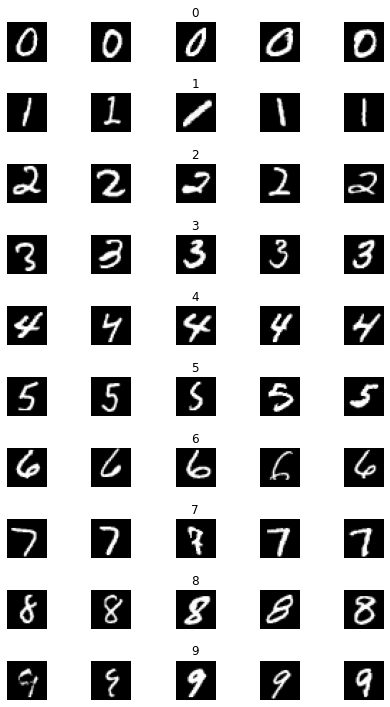

In [90]:
n_samples = []
cols=5
n_classes=10
fig, ax = plt.subplots(nrows=n_classes, ncols=cols, figsize=(6, 10))
fig.tight_layout()
for i in range(cols):
    for j in range(n_classes):
        x_selected = X_train[y_train==j]
        ax[j][i].imshow(x_selected[random.randint(0, len(x_selected-1)), :, :], cmap=plt.get_cmap('gray'))
        ax[j][i].axis('off')
        if i == int(cols/2):
            ax[j][i].set_title(str(j))
            n_samples.append(len(x_selected))

[5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]


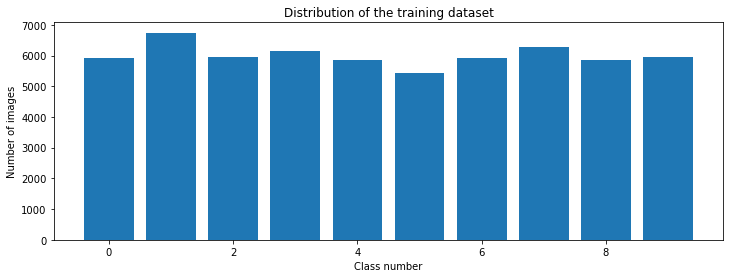

In [91]:
print(n_samples)
plt.figure(figsize=(12, 4))
plt.bar(range(0, n_classes), n_samples)
plt.title('Distribution of the training dataset')
plt.xlabel('Class number')
plt.ylabel('Number of images')
plt.show()

In [92]:
np.std(n_samples)

322.082908581005

In [93]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [94]:
y_train.shape

(60000, 10)

In [95]:
X_train = X_train/255
X_test = X_test/255

In [96]:
n_pixels= 28*28


In [97]:
n_pixels
X_train = X_train.reshape(X_train.shape[0], n_pixels)
X_test = X_test.reshape(X_test.shape[0], n_pixels)

In [98]:
X_train.shape

(60000, 784)

In [99]:
def create_model():
    model=Sequential()
    model.add(Dense(10, input_dim=n_pixels, activation='relu'))
    model.add(Dense(10, activation='relu'))
    # model.add(Dense(10, activation='relu'))
    model.add(Dense(n_classes, activation='softmax'))
    model.compile(Adam(learning_rate=0.01),  loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [100]:
model = create_model()
print(model.summary())

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_13 (Dense)            (None, 10)                7850      
                                                                 
 dense_14 (Dense)            (None, 10)                110       
                                                                 
 dense_15 (Dense)            (None, 10)                110       
                                                                 
Total params: 8,070
Trainable params: 8,070
Non-trainable params: 0
_________________________________________________________________
None


In [101]:
h = model.fit(X_train, y_train, validation_split=0.1, epochs=10, batch_size=200, verbose=1, shuffle=True)

Epoch 1/10
270/270 [==============================] - 1s 4ms/step - loss: 0.5511 - accuracy: 0.8268 - val_loss: 0.2791 - val_accuracy: 0.9177
Epoch 2/10
270/270 [==============================] - 1s 3ms/step - loss: 0.3190 - accuracy: 0.9082 - val_loss: 0.2490 - val_accuracy: 0.9268
Epoch 3/10
270/270 [==============================] - 1s 3ms/step - loss: 0.2841 - accuracy: 0.9179 - val_loss: 0.2209 - val_accuracy: 0.9392
Epoch 4/10
270/270 [==============================] - 1s 4ms/step - loss: 0.2669 - accuracy: 0.9229 - val_loss: 0.2246 - val_accuracy: 0.9365
Epoch 5/10
270/270 [==============================] - 1s 3ms/step - loss: 0.2543 - accuracy: 0.9271 - val_loss: 0.2025 - val_accuracy: 0.9402
Epoch 6/10
270/270 [==============================] - 1s 3ms/step - loss: 0.2478 - accuracy: 0.9296 - val_loss: 0.2007 - val_accuracy: 0.9452
Epoch 7/10
270/270 [==============================] - 1s 3ms/step - loss: 0.2400 - accuracy: 0.9299 - val_loss: 0.1985 - val_accuracy: 0.9440
Epoch 

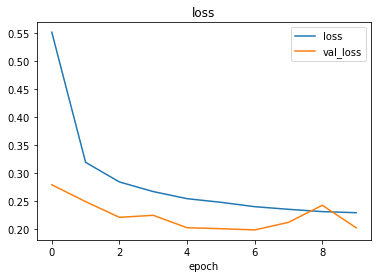

In [102]:
plt.plot(h.history['loss'])
plt.plot(h.history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.title('loss')
plt.xlabel('epoch')
plt.show()

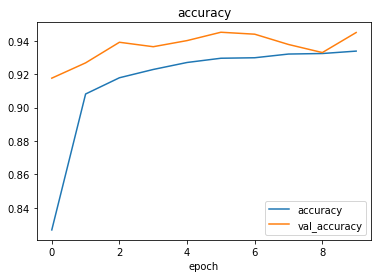

In [104]:
plt.plot(h.history['accuracy'])
plt.plot(h.history['val_accuracy'])
plt.legend(['accuracy', 'val_accuracy'])
plt.title('accuracy')
plt.xlabel('epoch')
plt.show()

In [107]:
score = model.evaluate(X_test, y_test, verbose=0)

In [110]:
print('test score', score[0])
print('accuracy', score[1])

test score 0.25759321451187134
accuracy 0.9284999966621399
